---
title: Optimizating Logistic Regression
author: Anweshan Adhikari
date: '2023-05-23'
image: "image.jpg"
description: "Exploring the fit and  Gradient Descent method in Optimizating Logistic Regression "
format: html
---

# Introduction 
Hello everyone! On the first blog post, we discussed about the perceptron algorithmn, but here, we will be learning about a more complex algorithm called logistic regression. Similar to the perceptron algorithm, logistic regression is also used for classification tasks. In this post, we will look at  how logistic regression work, how it utilizes the gradient descent and stochastic gradient descent to learn from the data.

First, in this [python file](https://github.com/An65011065/An65011065.github.io/blob/main/posts/Gradient%20Descent/LogisticRegression.py), I have implemented a simple logistic regression algorithm. The main method in the Logistic Regression Class is fit.

# Exploring the Fit Method

In our fit method, we first initialize the weights vector with zeros and add input matrix with a column of ones for the bias term. From here on, we enter a loop which continues for a predetermined number of iterations(epochs). In every iteration, we are computing the gradient of the loss function with respect to the weights, and then update our weight vector by taking a step defined at alpha in the direction of the steepest descent. Note that we  are also computing the value of the loss function. This will give us an idea of how well our model is doing. We will repeat this process until we reach the maximum number of iterations defined earlier.


In [2]:
import numpy as np
def fit(self, X, y, alpha=0.1, max_epochs=1000):
        n, m = X.shape
        self.w = np.zeros(m+1)
        X_bias = np.insert(X, 0, 1, axis=1)

        for epoch in range(max_epochs):
            z = np.dot(X_bias, self.w)
            h = self.sigmoid(z)
            gradient = np.dot(X_bias.T, (h - y)) / y.size
            self.w -= alpha * gradient

            loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
            self.loss_history.append(loss)

            score = self.score(X, y)
            self.score_history.append(score)


# Testing Gradient Descent Method: 
First let's generate some data datapoints with 3 features.

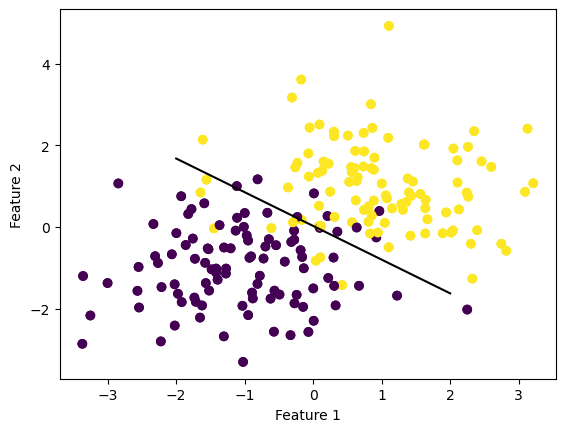

In [56]:
# Testing Gradient Descent Method: 
from LogisticRegression import LogisticRegression 
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12345)

p_features = 3

X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig1 = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
#fitting the model using the fit method
from LogisticRegression import LogisticRegression 
LR = LogisticRegression()

LR.fit(X, y, alpha = 0.1, max_epochs = 100000)


def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[1]*x + w[0])/w[2]


  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
fig = draw_line(LR.w, -2, 2)


In [15]:
print("Loss history:", LR.loss_history)
print("Score history:", LR.score_history)

Loss history: [0.6931471805599453, 0.5658264060173659, 0.47630436968900297, 0.4117066629677562, 0.3635584388030227, 0.32653074702226736, 0.29725827937099547, 0.27356433215013903, 0.2539985509888486, 0.2375653290716443, 0.22356198491616386, 0.21147996906192568, 0.20094288026956744, 0.19166650705564547, 0.18343239842693965, 0.17606996287961177, 0.16944407699061018, 0.16344633586152088, 0.157988762285683, 0.15299920848061677, 0.1484179439782063, 0.14419508854267601, 0.14028865625551448, 0.13666304782279304, 0.13328787585461396, 0.13013704045850116, 0.12718799509333528, 0.12442115852644507, 0.12181944005969675, 0.11936785335392716, 0.11705320013314786, 0.11486380943564586, 0.11278932134275504, 0.11082050656741733, 0.10894911514204669, 0.10716774886422392, 0.10546975325131629, 0.10384912560255576, 0.1023004364290096, 0.10081876203229026, 0.09939962642459087, 0.09803895111034205, 0.09673301151209483, 0.09547839903433232, 0.09427198792967535, 0.09311090627075956, 0.09199251044443603, 0.090914

Now that we saw a simple linear regression implementation, let's look at how the stochastic gradient descent differs from the fit method. 

# Stochastic Gradient Descent
The need for a stochastic gradient descent comes because the first implementation of gradient descent can be computationally expensive because we are using the entire dataset everytime to compute the gradient descent and updating weights. In stochastic gradient descent, we don’t compute the complete gradient, but we compute a stochastic gradient by picking a random subset 
$S \subseteq [n] = \{1, \ldots, n\}$. Selecting a smaller size of data can makeour algorithm faster and less computationally heavy. Let's look at what is going on in the fir method here:


In [57]:
#stochastic graddescent implementation
def fit_stochastic(self, X, y, alpha=0.1, max_epochs=1000, batch_size=32):
    n, m = X.shape
    self.w = np.zeros(m+1)
    X_bias = np.insert(X, 0, 1, axis=1)
    self.loss_history = []
    self.score_history = []
        
    for epoch in range(max_epochs):
        order = np.random.permutation(n)
        X_shuffled = X_bias[order]
        y_shuffled = y[order]
            
        for sub in range(0, n, batch_size):
            xsub = X_shuffled[sub:sub+batch_size]
            ysub = y_shuffled[sub:sub+batch_size]
                
            z = np.dot(xsub, self.w)
            h = self.sigmoid(z)
            gradient = np.dot(xsub.T, (h - ysub)) / batch_size
            self.w -= alpha * gradient
                
            loss = (-ysub * np.log(h) - (1 - ysub) * np.log(1 - h)).mean()
            self.loss_history=self.loss_history.append(loss)

            score = self.score(X, y)
            self.score_history=self.score_history.append(score)

Similar to our first fit method, we initialize our weights and add input matrix with a column for bias term. Then, at every iteration, we shuffle the data using np.random.permutation(). This shuffling helps in ensuring that we explore the entire dataset properly.The main difference is instead of updating the weights once per iteration using the entire data, we update the weights multiple times within a single iteration. So after splitting the shuffled data into smaller subset, we compute the sigmoid function, gradient, and update our weights. Then, similar to the fit method, we are computing the loss and accuracy for each iteration and appending them to the history array. 


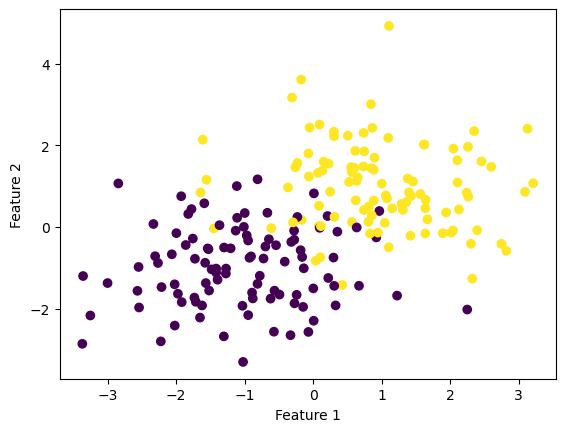

In [61]:
from LogisticRegression import LogisticRegression 
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12345)

p_features = 3

X1, y1 = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])
fig1 = plt.scatter(X1[:,0], X1[:,1], c = y1)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


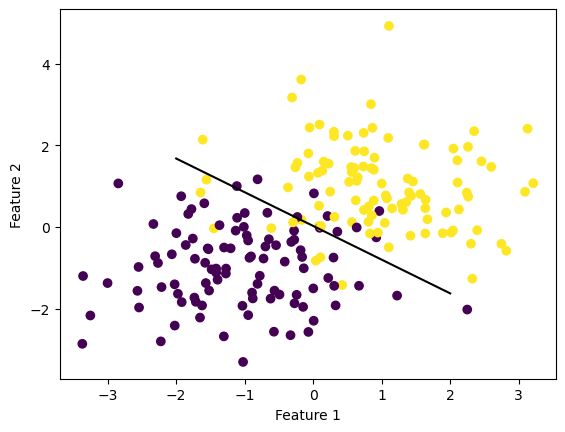

In [62]:
#fitting from stochastic graddescent

from LogisticRegression import LogisticRegression 
LR1 = LogisticRegression()

LR1.fit_stochastic(X1, y1, alpha = 0.1, max_epochs = 100000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[1]*x + w[0])/w[2]
  plt.plot(x, y, color = "black")

fig1 = plt.scatter(X1[:,0], X1[:,1], c = y1)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
fig1 = draw_line(LR1.w, -2, 2)

# Examples 
`A case in which gradient descent does not converge to a minimizer because the learning rate is too large.`

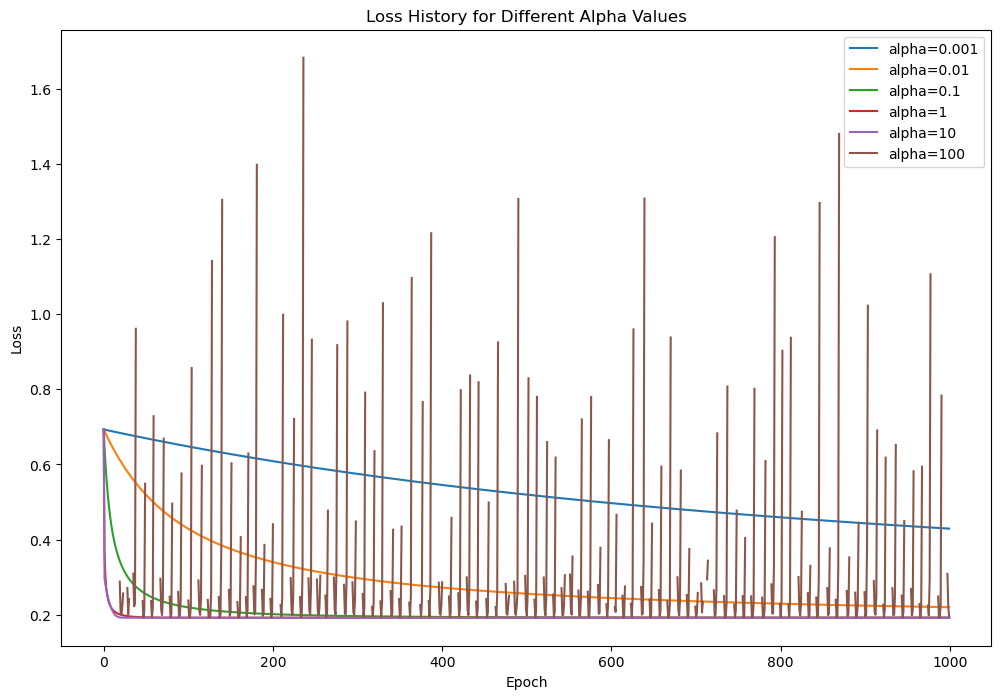

In [89]:
from LogisticRegression import LogisticRegression 
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12345)

p_features = 3

X2, y2 = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

LR2 = LogisticRegression()
plt.figure(figsize=(12, 8))

for alpha in alpha_values:
    LR2 = LogisticRegression()
    LR2.fit(X2, y2, alpha = alpha, max_epochs = 1000)
    
    plt.plot(range(len(LR2.loss_history)), LR2.loss_history, label=f'alpha={alpha}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History for Different Alpha Values')
plt.legend()

plt.show()


We can see that for alpha at 0.1, the model converges fast, i.e it is learning quickly. At alpha of 0.001 the loss is decreasing slowly, which means the model is learning but slowly. Hence a higher alpha rate can be used to speed up training. However, at alpha= 100, we can see the model overshooting indicating that there is instability in the training process. Hence it is important to choose the optimal alpha value to ensure the optimal point isn't overshooted.

'A case in which the choice of batch size influences how quickly the algorithm converges.'

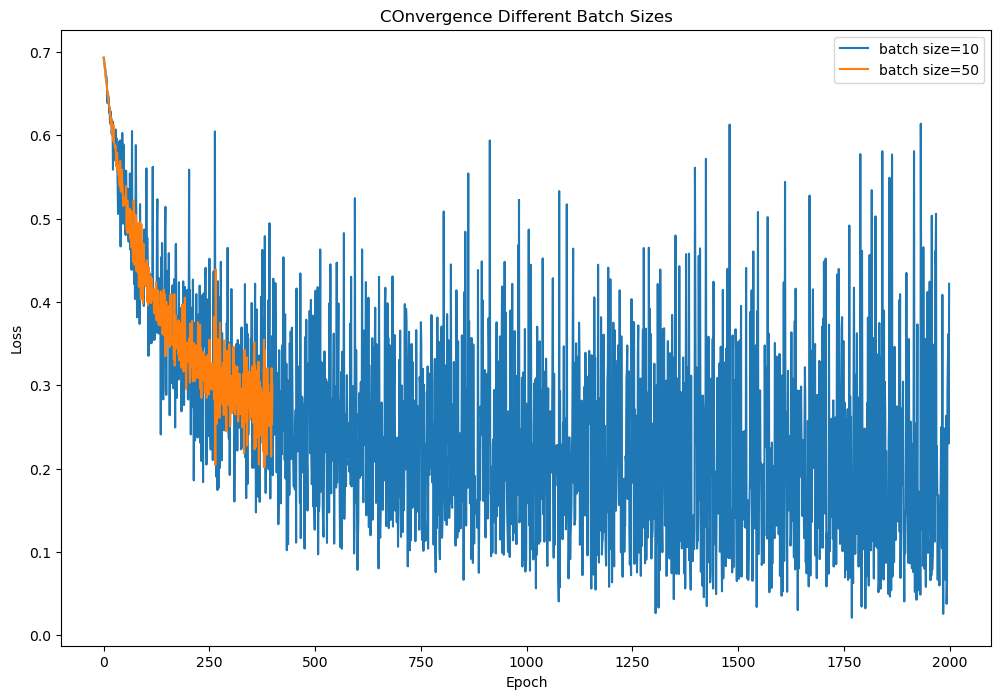

In [92]:
batch_sizes = [10, 50]

plt.figure(figsize=(12, 8))

for batch_size in batch_sizes:
    LR2 = LogisticRegression()
    LR2.fit_stochastic(X2, y2, batch_size=batch_size, alpha=0.01, max_epochs=100)
    plt.plot(range(len(LR2.loss_history)), LR2.loss_history, label=f'batch size={batch_size}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('COnvergence Different Batch Sizes')
plt.legend()

plt.show()

Based on the graph, we can see that a higher batch size converges faster and it seems more stable in training and convergence. The line disappearing after 400 epochs could be due to the fact that the model has already converged to a minimum of the loss function. On the other hand, a smaller batch size has an unstable loss score which indicates that the model is not converging to a minimum, but is instead bouncing as seen in the graph. 
